In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from scipy import stats

!whoami
!date

ndbs
Mon Dec 14 11:09:52 PST 2020


# Goal: Find a distribution with a median of 4 and a max of 24 (and min 0)

The distribution is supposed to represent sojourn times of a certain type of cancer for individuals within a population.

## Let's try a scaled Beta distribution

According to [Wikipedia](https://en.wikipedia.org/wiki/Beta_distribution), the approximate median of a Beta distribution with $\alpha,\beta \ge 1$ is $m\approx \frac{\alpha - 1/3}{\alpha+\beta - 2/3}$ (the formula is exact when $\alpha=\beta$, in which case the distribution is symmetric and the median is $1/2$).
Thus we can choose either $\alpha$ or $\beta$, and use this formula to solve for the other shape parameter in terms of the approximate median.


# First define functions to compute the median and solve for alpha or beta

In [2]:
def median_from_alpha_and_beta(alpha, beta):
    return (alpha - 1/3)/(alpha + beta -2/3) # = median

def beta_from_median_and_alpha(median, alpha):
    return (alpha-1/3)/median - alpha + 2/3 # = beta

def alpha_from_median_and_beta(median, beta):
    return ((beta - 2/3)*median + 1/3)/(1-median) # = alpha

# Check that the formulas are correct for the $\alpha=\beta=1$ case

Yep, looks good!

In [3]:
median_from_alpha_and_beta(1,1)

0.5

In [4]:
beta_from_median_and_alpha(1/2, 1)

1.0

In [5]:
alpha_from_median_and_beta(1/2, 1)

1.0

# Now set $m=4/24 = 1/6$ and see what sorts of values we get

Looks like it'll be a bit easier to get reasonable values (i.e. $\alpha,\beta\ge 1$) by choosing $\alpha$ first then solving for $\beta$.

In [6]:
m = 1/6

## First choose $\alpha$ and compute $\beta$

In [7]:
beta_from_median_and_alpha(m, 1)

3.6666666666666674

In [8]:
beta_from_median_and_alpha(m, 2)

8.666666666666668

In [9]:
beta_from_median_and_alpha(m, 0.8)

2.6666666666666674

## Now choose $\beta$ and compute $\alpha$

In [10]:
alpha_from_median_and_beta(m, 1)

0.4666666666666667

In [11]:
alpha_from_median_and_beta(m, 2)

0.6666666666666666

In [12]:
alpha_from_median_and_beta(m, 3)

0.8666666666666666

In [13]:
alpha_from_median_and_beta(m, 4)

1.0666666666666667

In [14]:
alpha_from_median_and_beta(m, 0.5)

0.36666666666666664

# Write a function to plot the distribution for a given $\alpha$

[SciPy documentation for Beta distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html)

Beta distribution -- alpha=1.5, beta=6.166666666666668
median=4.047621241699922, mean=4.695652173913043
central 95% interval = (0.4007150530066122, 12.446761758172812)
P(X > 20) = 4.3681948004747895e-05




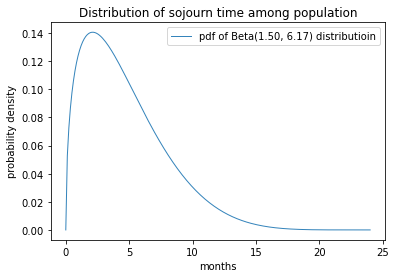

In [15]:
def plot_beta_distribution_for_chosen_alpha(ax, a):
    #min=loc and max=loc+scale
    loc = 0
    scale = 24

    median = 4

    # divide median by scale to get median of unscaled beta distribution
#     a = 1.5
    b = beta_from_median_and_alpha(median/scale, a)

    beta_dist = stats.beta(a, b, loc, scale)

    x = np.linspace(loc, loc+scale, 200)
    ax.plot(x, beta_dist.pdf(x), lw=1, alpha=0.9, label=f'pdf of Beta({a:.2f}, {b:.2f}) distributioin')
    
    ax.set_title('Distribution of sojourn time among population')
    ax.set_xlabel('months')
    ax.set_ylabel('probability density')
    ax.legend()

    print(f'Beta distribution -- alpha={a}, beta={b}')
    print(f'median={beta_dist.median()}, mean={beta_dist.mean()}')
    print(f'central 95% interval = {beta_dist.interval(.95)}')
    print(f'P(X > 20) = {beta_dist.sf(20)}') # sf stands for survival function
    print('\n')
    
# Test with alpha=1.5
fig, ax = plt.subplots(1,1)
plot_beta_distribution_for_chosen_alpha(ax, 1.5)
plt.show()

# Plot the distribution for a few choices of $\alpha$

Any of these $\alpha$'s seems reasonable, unless the data says there should be a larger probability of seeing a value near the maximum of 24 months (the probability of seeing anything greater than 20 is essentially 0 for $\alpha=1.5$ or $\alpha=2$, and is about 1 in 1000 for $\alpha=1$).

- With $\alpha=2$, the density looks like $y=cx$ near the origin for some constant $c$ (so it has slope $c$ at $x=0$).
- With $\alpha=1.5$, then density looks like $y=c\sqrt x$ near the origin for some constant $c$ (so it has a vertical slope at $x=0$).
- With $\alpha=1$, the density has a $y$-intercept greater than 0 and looks similar to exponential decay, except that it hits 0 at $x=24$.

Note that as $\alpha$ decreases, $\beta$ also decreases, and thus the probability of getting values near the extremes of 0 and 24 increases.

Beta distribution -- alpha=1.5, beta=6.166666666666668
median=4.047621241699922, mean=4.695652173913043
central 95% interval = (0.4007150530066122, 12.446761758172812)
P(X > 20) = 4.3681948004747895e-05


Beta distribution -- alpha=2, beta=8.666666666666668
median=4.0239226816820075, mean=4.499999999999999
central 95% interval = (0.6268385004262451, 10.964883571319978)
P(X > 20) = 1.4825580488819767e-06


Beta distribution -- alpha=1, beta=3.6666666666666674
median=4.133921282764538, mean=5.1428571428571415
central 95% interval = (0.1651457513380669, 15.22421874403356)
P(X > 20) = 0.0014020992228642726




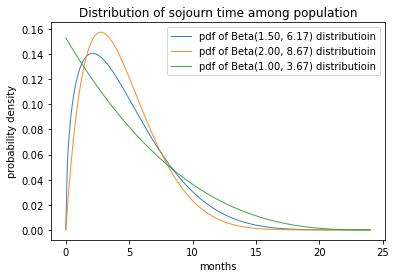

In [16]:
fig, ax = plt.subplots(1,1)
plot_beta_distribution_for_chosen_alpha(ax, 1.5)
plot_beta_distribution_for_chosen_alpha(ax, 2)
plot_beta_distribution_for_chosen_alpha(ax, 1)
plt.show()

# Plot the distribution for some more extreme choices of $\alpha$

- The plot with $\alpha=1.5$ is repeated for comparison with above.

- With $\alpha=0.5$, the graph looks like $y=\frac{c}{\sqrt x}$ near $x=0$ for some constant $c$, so values near 0 are more likely than with $\alpha>1$ since the probability density has a vertical asymptote at 0. Also, we have $\beta = 7/6 < 2$, resulting in a nontrivial probability of getting values near the maximum of 24 months, which may or may not be desirable depending on what the data from the literature says. However, since $\alpha<1$, our approximation for the median is less accurate, so the median of this distribution is 5.1 instead of 4. If we wanted a distribution with a similar shape but the correct median, we'd have to do some more experimenting with the values of $\alpha$ and $\beta$.

- With $\alpha=5$, the distribution looks much more symmetric, with very small probabilities of getting values near the extremes of 0 or 24. As $\alpha\to\infty$, the Beta distribution will look more and more like a very narrow normal distribution centered at 4.

Beta distribution -- alpha=1.5, beta=6.166666666666668
median=4.047621241699922, mean=4.695652173913043
central 95% interval = (0.4007150530066122, 12.446761758172812)
P(X > 20) = 4.3681948004747895e-05


Beta distribution -- alpha=0.5, beta=1.166666666666667
median=5.103602462413811, mean=7.199999999999998
central 95% interval = (0.012442536137232486, 22.097054640935852)
P(X > 20) = 0.06104207453092125


Beta distribution -- alpha=5, beta=23.66666666666667
median=4.003110340528789, mean=4.186046511627906
central 95% interval = (1.4738095227103656, 7.923135060124106)
P(X > 20) = 3.6637359812630166e-15




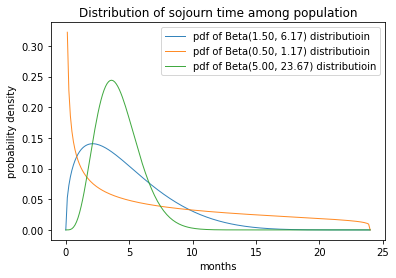

In [17]:
fig, ax = plt.subplots(1,1)
plot_beta_distribution_for_chosen_alpha(ax, 1.5)
plot_beta_distribution_for_chosen_alpha(ax, 0.5)
plot_beta_distribution_for_chosen_alpha(ax, 5)
plt.show()

# For comparison, let's try a simple mixture of uniform distributions, with piecewise constant density

That is, what if the sojourn time were uniformly distributed on $[0,4]$ and on $[4,24]$, each with probability 1/2? Then the median is 4 by construction. This [mixture distribution](https://en.wikipedia.org/wiki/Mixture_distribution) is the [maximum entropy distribution](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution) with minimum 0, median 4, and maximum 24, meaning that it assumes no information other than these properties.

## First define the density function, cumulative distribution function, and quantile function

In [18]:
def uniform_mixture_density(x):
    return np.select([x<=0, x<=4, x<=24], [0, 1/8, 1/40], default=0)

def uniform_mixture_cdf(x):
    return np.select([x<=0, x<=4, x<=24], [0, x/8, 0.5+(x-4)/40], default=1)

def uniform_mixture_quantile(p):
    return np.select([p<0, p<=0.5, p<=1], [np.nan, 8*p, 4+40*(p-0.5)], default=np.nan)

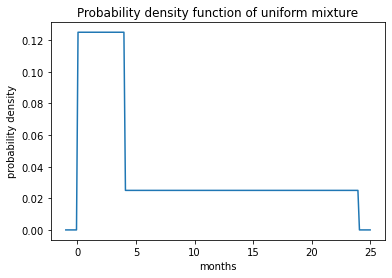

In [19]:
x = np.linspace(-1, 25, 200)
plt.plot(x, uniform_mixture_density(x))
plt.xlabel('months')
plt.ylabel('probability density')
plt.title('Probability density function of uniform mixture')
plt.show()

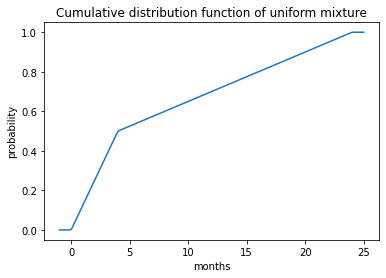

In [20]:
x = np.linspace(-1, 25, 200)
plt.plot(x, uniform_mixture_cdf(x))
plt.xlabel('months')
plt.ylabel('probability')
plt.title('Cumulative distribution function of uniform mixture')
plt.show()

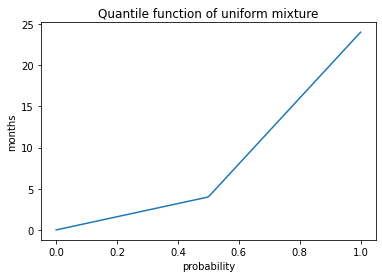

In [21]:
p = np.linspace(0, 1, 200)
plt.plot(p, uniform_mixture_quantile(p))
plt.xlabel('probability')
plt.ylabel('months')
plt.title('Quantile function of uniform mixture')
plt.show()

# Test my quantile function and compute some statistics of the distribution

Use [invrese transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to get an array of values distributed according to the uniform mixture, then use pandas to compute some statistics of the distribution for me and draw a histogram.

### First, cheat by starting with "perfectly uniform" quantile ranks rather than actually sampling a uniform random variable

In [22]:
p = np.linspace(0, 1, 2000) # evenly spaced quantile ranks, i.e. "perfectly uniform"
s = pd.Series(uniform_mixture_quantile(p)) # get an inverse transform sample
s.describe(percentiles=[.025,.975]) # compute statistics

count    2000.000000
mean        8.002001
std         7.308447
min         0.000000
2.5%        0.200000
50%         4.004002
97.5%      23.000000
max        24.000000
dtype: float64

<AxesSubplot:>

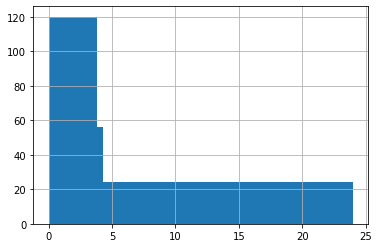

In [23]:
s.hist(bins=50)

### Now do an actual random sample

In [24]:
p = np.random.uniform(0, 1, size=2000) # uniformly distributed quantile ranks
s = pd.Series(uniform_mixture_quantile(p)) # get an inverse transform sample
s.describe(percentiles=[.025,.975]) # compute statistics

count    2000.000000
mean        8.107861
std         7.389862
min         0.001541
2.5%        0.159341
50%         3.992145
97.5%      22.828455
max        23.928708
dtype: float64

<AxesSubplot:>

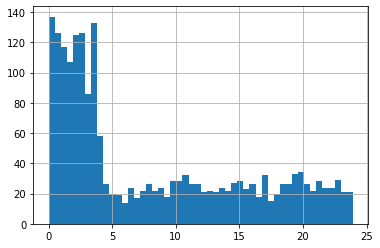

In [25]:
s.hist(bins=50)

# Plot the uniform mixture and some Beta distributions together for comparison

The uniform mixture behaves somewhat similarly to the $\alpha=1.5$ Beta distribution for $x\in [0,4]$, and somewhat similarly to the $\alpha=0.5$ Beta distribution for $x\in [4,24]$.

Uniform mixture distribution -- 1/2 Unif(0,4) and 1/2 Unif(4,24)
median=4.0, mean=8.0
central 95% interval = (0.2, 23.0)
P(X > 20) = 0.09999999999999998




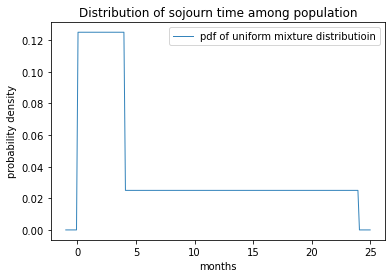

In [26]:
def plot_uniform_mixture_density(ax):
    #min=loc and max=loc+scale
    loc = 0
    scale = 24

    x = np.linspace(loc-1, loc+scale+1, 200)
    ax.plot(x, uniform_mixture_density(x), lw=1, alpha=0.9, label=f'pdf of uniform mixture distributioin')

    ax.set_title('Distribution of sojourn time among population')
    ax.set_xlabel('months')
    ax.set_ylabel('probability density')
    ax.legend()

    print(f'Uniform mixture distribution -- 1/2 Unif(0,4) and 1/2 Unif(4,24)')
    print(f'median={uniform_mixture_quantile(1/2)}, mean={0.5*(2+(4+24)/2)}')
#     print(f'central 95% interval = ({uniform_mixture_quantile(.025)}, {uniform_mixture_quantile(.975)})')
    print(f'central 95% interval = {tuple(uniform_mixture_quantile(np.array([.025,0.975])))}')
    print(f'P(X > 20) = {1-uniform_mixture_cdf(20)}')
    print('\n')
    
# Test plotting function
fig, ax = plt.subplots(1,1)
plot_uniform_mixture_density(ax)
plt.show()

Beta distribution -- alpha=1.5, beta=6.166666666666668
median=4.047621241699922, mean=4.695652173913043
central 95% interval = (0.4007150530066122, 12.446761758172812)
P(X > 20) = 4.3681948004747895e-05


Beta distribution -- alpha=0.5, beta=1.166666666666667
median=5.103602462413811, mean=7.199999999999998
central 95% interval = (0.012442536137232486, 22.097054640935852)
P(X > 20) = 0.06104207453092125


Uniform mixture distribution -- 1/2 Unif(0,4) and 1/2 Unif(4,24)
median=4.0, mean=8.0
central 95% interval = (0.2, 23.0)
P(X > 20) = 0.09999999999999998




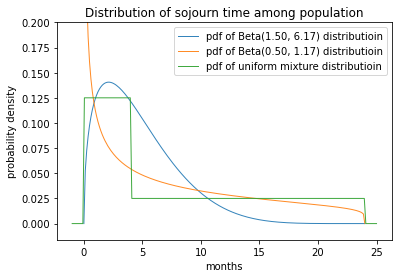

In [27]:
fig, ax = plt.subplots(1,1)
plot_beta_distribution_for_chosen_alpha(ax, 1.5)
plot_beta_distribution_for_chosen_alpha(ax, 0.5)
plot_uniform_mixture_density(ax)
ax.set_ylim(top=0.2)
plt.show()